In [ ]:
import os 
import torch

In [3]:
#load a .pt file 
dataset = "./datasets/density_karman_Re_200.pt"
data = torch.load(dataset, weights_only=True)

In [ ]:
data.shape

In [ ]:
#the first dimension is the number of samples
#plot a gif of the samples
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

fig = plt.figure()
ims = []
for i in range(data.shape[0]):
    im = plt.imshow(data[i,0,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()

ani.save('full_density_karman_Re_200.gif', writer='imagemagick', fps=10)

In [5]:
# save only the samples after step 350 from the dataset into a .pt file
data = data[350:]
torch.save(data, "./Datasets/VortexStreet_Re_200_default/density_karman_Re_200_after_step_350.pt")

In [ ]:
#visualize the samples after step 350
fig = plt.figure()
ims = []
for i in range(data.shape[0]):
    im = plt.imshow(data[i,0,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()


In [ ]:
ani.save('cut_density_karman_Re_200.gif', writer='imagemagick', fps=10)

In [5]:
#load the velocity field
vel_dataset = "./datasets/velocity_karman_Re_200.pt"
vel_data = torch.load(vel_dataset, weights_only=True)


In [ ]:
vel_data.shape

In [ ]:
vel_mag = torch.linalg.norm(vel_data, ord=2, dim=1)
vel_mag.shape

In [ ]:
#save this dataset as a .gif file
fig = plt.figure()
ims = []
vel_mag = torch.linalg.norm(vel_data, ord=2, dim=1)
for i in range(vel_data.shape[0]):
    #save the velocity magnitude
    im = plt.imshow(vel_mag[i,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()
ani.save('full_velocity_karman_Re_200.gif', writer='imagemagick', fps=10)

In [12]:
# save only the samples after step 350 from the dataset into a .pt file
vel_data = vel_data[350:]
torch.save(vel_data, "./Datasets/VortexStreet_Re_200_default/velocity_karman_Re_200_after_step_350.pt")

In [ ]:
#visualize the samples after step 350
fig = plt.figure()
ims = []
vel_mag = torch.linalg.norm(vel_data, ord=2, dim=1)
for i in range(vel_data.shape[0]):
    #save the velocity magnitude
    im = plt.imshow(vel_mag[i,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()
ani.save('cut_velocity_karman_Re_200.gif', writer='imagemagick', fps=10)

In [ ]:
#merge density and velocity fields

#load dataset
density_data = torch.load('./Datasets/VortexStreet_Re_200_default/density_karman_Re_200_after_step_350.pt', weights_only=True) 
velocity_data = torch.load('./Datasets/VortexStreet_Re_200_default/velocity_karman_Re_200_after_step_350.pt', weights_only=True) 

density_data.shape

In [ ]:
#merge datasets
mixed_data = torch.cat((density_data, velocity_data), dim=1)
print("Shape of the mixed data: ", mixed_data.shape)

In [20]:
torch.save(mixed_data, './Datasets/VortexStreet_Re_200_default/mixed_karman_Re_200_after_step_350.pt')

In [3]:
velocity_dataset = "./Datasets/VortexStreet_Re_200_period_1/velocity_karman_vortex_re_200_period_1.pt"

In [7]:
velocity_array = torch.load(velocity_dataset, weights_only=True)

In [ ]:
velocity_array.shape

In [ ]:
import os
os.getcwd()

In [10]:
# Step 2: Set the directory to save plots
save_dir = "./Datasets/VortexStreet_Re_200_period_1/velocity_plots"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

In [ ]:
import matplotlib.pyplot as plt
import torch
import os

# Assuming velocity_array is your PyTorch tensor with shape [1000, 2, 512, 256]
# Example: velocity_array = torch.randn(1000, 2, 512, 256)

# Step 1: Determine the global min and max of the x component across all timesteps
x_velocity_all = velocity_array[:, 0, :, :]  # Extract all timesteps for the x component
global_min = x_velocity_all.min().item()
global_max = x_velocity_all.max().item()

# Step 2: Set the directory to save plots
save_dir = "./Datasets/VortexStreet_Re_200_period_1/velocity_plots"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Step 3: Loop through all timesteps and plot two consecutive timesteps
num_timesteps = velocity_array.shape[0]

for t in range(num_timesteps - 1):
    # Extract the x component of velocity (first channel) for consecutive timesteps
    x_velocity_t1 = velocity_array[t, 0, :, :]  # Shape [512, 256]
    x_velocity_t2 = velocity_array[t + 1, 0, :, :]  # Shape [512, 256]

    # Plot the two timesteps together
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(x_velocity_t1.cpu().numpy(), cmap='viridis', vmin=global_min, vmax=global_max)
    plt.title(f'X Velocity at Timestep {t}')
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow(x_velocity_t2.cpu().numpy(), cmap='viridis', vmin=global_min, vmax=global_max)
    plt.title(f'X Velocity at Timestep {t + 1}')
    plt.colorbar()

    # Save the plot
    plot_filename = f'velocity_timestep_{t}_{t+1}.png'
    plt.savefig(os.path.join(save_dir, plot_filename))

    # Close the plot to avoid memory issues
    plt.close()

print(f"Plots saved to directory: {save_dir}")

In [ ]:
#load the default dataset
velocity_dataset = "./datasets/velocity_karman_Re_200.pt"
#show the shape of the dataset
velocity_array = torch.load(velocity_dataset, weights_only=True)
velocity_array.shape

In [ ]:
# plot the x velocity of the timesteps 500 and 501 in the same plot
x_velocity_t500 = velocity_array[500, 0, :, :]
x_velocity_t501 = velocity_array[501, 0, :, :]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x_velocity_t500.cpu().numpy(), cmap='viridis')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(x_velocity_t501.cpu().numpy(), cmap='viridis')
plt.colorbar()
plt.show()



In [ ]:
#checking inlet veloctiy
x_velocity_inlet = velocity_array[0, 0, :, :]
#print the unique values from the velocity array at timestep 0
unique_values = torch.unique(x_velocity_inlet)
print("Unique values: ", unique_values)
#print the grid locations where the velocity is 0
zero_indices = torch.where(x_velocity_inlet == 0)
#need it in the form of (x,y):
zero_indices = list(zip(zero_indices[0].tolist(), zero_indices[1].tolist()))
print("Indices where the velocity is 0: ", zero_indices)

In [49]:
# load another dataset
velocity_dataset = "./datasets/velocity_karman_Re_100.pt"

In [ ]:
velocity_array = torch.load(velocity_dataset, weights_only=True)
velocity_array.shape

In [ ]:
# plot the x velocity of the timesteps 500 and 501 in the same plot
x_velocity_t500 = velocity_array[500, 0, :, :]
x_velocity_t501 = velocity_array[501, 0, :, :]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x_velocity_t500.cpu().numpy(), cmap='viridis')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(x_velocity_t501.cpu().numpy(), cmap='viridis')
plt.colorbar()
plt.show()



In [ ]:
#checking inlet veloctiy
x_velocity_inlet = velocity_array[0, 0, :, :]
#print the unique values from the velocity array at timestep 0
unique_values = torch.unique(x_velocity_inlet)
print("Unique values: ", unique_values)
#print the grid locations where the velocity is 0
zero_indices = torch.where(x_velocity_inlet == 0)
#need it in the form of (x,y):
zero_indices = list(zip(zero_indices[0].tolist(), zero_indices[1].tolist()))
print("Indices where the velocity is 0: ", zero_indices)

# Downsampling and Plotting

In [16]:
# For tend 200 and dt = 0.2 for Re 100 to Re 500
import torch
import os

In [17]:
base_folder = "./Dataset_KVS_200_0.2_re_100-500_1024x256/Re_500_down_downsampled"
Re = 500

#load all the files which start with density    
density_files = [f for f in os.listdir(base_folder) if f.startswith("density")]
density_files.sort()
print("Density files: ", density_files)
print("Number of density files: ", len(density_files))

#concatenate all the density files
density_data = torch.cat([torch.load(os.path.join(base_folder, f), weights_only=True) for f in density_files], dim=0)
print("Downsampled Density data shape: ", density_data.shape)

density_data_down_downsampled = density_data[350:]

#print max
max_density = torch.max(density_data_down_downsampled)
print("Max density downsampled: ", max_density)
min_density = torch.min(density_data_down_downsampled)
print("Min density downsampled: ", min_density)

Density files:  ['density_0000.pt', 'density_0001.pt', 'density_0002.pt', 'density_0003.pt', 'density_0004.pt', 'density_0005.pt', 'density_0006.pt', 'density_0007.pt', 'density_0008.pt', 'density_0009.pt', 'density_0010.pt', 'density_0011.pt', 'density_0012.pt', 'density_0013.pt', 'density_0014.pt', 'density_0015.pt', 'density_0016.pt', 'density_0017.pt', 'density_0018.pt', 'density_0019.pt', 'density_0020.pt', 'density_0021.pt', 'density_0022.pt', 'density_0023.pt', 'density_0024.pt', 'density_0025.pt', 'density_0026.pt', 'density_0027.pt', 'density_0028.pt', 'density_0029.pt', 'density_0030.pt', 'density_0031.pt', 'density_0032.pt', 'density_0033.pt', 'density_0034.pt', 'density_0035.pt', 'density_0036.pt', 'density_0037.pt', 'density_0038.pt', 'density_0039.pt', 'density_0040.pt', 'density_0041.pt', 'density_0042.pt', 'density_0043.pt', 'density_0044.pt', 'density_0045.pt', 'density_0046.pt', 'density_0047.pt', 'density_0048.pt', 'density_0049.pt', 'density_0050.pt', 'density_0051.

In [18]:
base_folder = "./Dataset_KVS_200_0.2_re_100-500_1024x256/Re_500_downsampled"

#load all the files which start with density    
density_files = [f for f in os.listdir(base_folder) if f.startswith("density")]
density_files.sort()
print("Density files: ", density_files)
print("Number of density files: ", len(density_files))

#concatenate all the density files
density_data = torch.cat([torch.load(os.path.join(base_folder, f), weights_only=True) for f in density_files], dim=0)
print("Downsampled Density data shape: ", density_data.shape)

density_data = density_data[350:]

#print max
max_density = torch.max(density_data)
print("Max density downsampled: ", max_density)
min_density = torch.min(density_data)
print("Min density downsampled: ", min_density)

Density files:  ['density_0000.pt', 'density_0001.pt', 'density_0002.pt', 'density_0003.pt', 'density_0004.pt', 'density_0005.pt', 'density_0006.pt', 'density_0007.pt', 'density_0008.pt', 'density_0009.pt', 'density_0010.pt', 'density_0011.pt', 'density_0012.pt', 'density_0013.pt', 'density_0014.pt', 'density_0015.pt', 'density_0016.pt', 'density_0017.pt', 'density_0018.pt', 'density_0019.pt', 'density_0020.pt', 'density_0021.pt', 'density_0022.pt', 'density_0023.pt', 'density_0024.pt', 'density_0025.pt', 'density_0026.pt', 'density_0027.pt', 'density_0028.pt', 'density_0029.pt', 'density_0030.pt', 'density_0031.pt', 'density_0032.pt', 'density_0033.pt', 'density_0034.pt', 'density_0035.pt', 'density_0036.pt', 'density_0037.pt', 'density_0038.pt', 'density_0039.pt', 'density_0040.pt', 'density_0041.pt', 'density_0042.pt', 'density_0043.pt', 'density_0044.pt', 'density_0045.pt', 'density_0046.pt', 'density_0047.pt', 'density_0048.pt', 'density_0049.pt', 'density_0050.pt', 'density_0051.

In [19]:
#load the original dataset
base_folder_original = "./Dataset_KVS_200_0.2_re_100-500_1024x256/infer/Re_500"

#load all the files which start with density    
density_files_original = [f for f in os.listdir(base_folder_original) if f.startswith("density")]
density_files_original.sort()
print("Density files: ", density_files_original)
print("Number of density files: ", len(density_files_original))

#concatenate all the density files
density_data_original = torch.cat([torch.load(os.path.join(base_folder_original, f), weights_only=True) for f in density_files_original], dim=0)
print("Original Density data shape: ", density_data_original.shape)

density_data_original = density_data_original[350:]

#print max
max_density = torch.max(density_data_original)
print("Max density original: ", max_density)
min_density = torch.min(density_data_original)
print("Min density original: ", min_density)

Density files:  ['density_0000.pt', 'density_0001.pt', 'density_0002.pt', 'density_0003.pt', 'density_0004.pt', 'density_0005.pt', 'density_0006.pt', 'density_0007.pt', 'density_0008.pt', 'density_0009.pt', 'density_0010.pt', 'density_0011.pt', 'density_0012.pt', 'density_0013.pt', 'density_0014.pt', 'density_0015.pt', 'density_0016.pt', 'density_0017.pt', 'density_0018.pt', 'density_0019.pt', 'density_0020.pt', 'density_0021.pt', 'density_0022.pt', 'density_0023.pt', 'density_0024.pt', 'density_0025.pt', 'density_0026.pt', 'density_0027.pt', 'density_0028.pt', 'density_0029.pt', 'density_0030.pt', 'density_0031.pt', 'density_0032.pt', 'density_0033.pt', 'density_0034.pt', 'density_0035.pt', 'density_0036.pt', 'density_0037.pt', 'density_0038.pt', 'density_0039.pt', 'density_0040.pt', 'density_0041.pt', 'density_0042.pt', 'density_0043.pt', 'density_0044.pt', 'density_0045.pt', 'density_0046.pt', 'density_0047.pt', 'density_0048.pt', 'density_0049.pt', 'density_0050.pt', 'density_0051.

In [ ]:
np.savetxt(f"density_{Re}_downsampled.txt", density_data[10,:,:].numpy(), fmt='%0.4f')
np.savetxt(f"density_{Re}_original.txt", density_data_original[10,:,:].numpy(), fmt='%0.4f')

MovieWriter imagemagick unavailable; using Pillow instead.


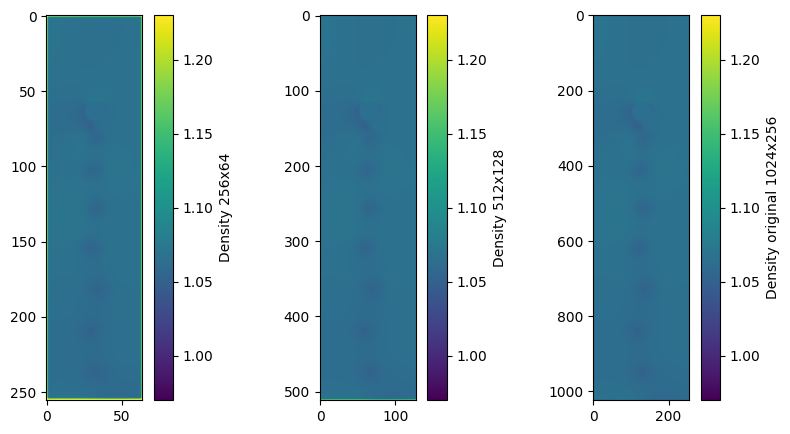

In [20]:
#create gif of the density data include Re in the filename 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# fig = plt.figure()
# ims = []
#include the Re and timestep in each frame# Set up the colorbar limits
vmin = 0.97
vmax = 1.23

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ims = []

# Create the first image to initialize the colorbars
#im1 = axes[0].imshow(density_data[0, :, :].numpy(), vmin=vmin, vmax=vmax, cmap='viridis')
#im2 = axes[1].imshow(density_data_original[0, :, :].numpy(), vmin=vmin, vmax=vmax, cmap='viridis')

im0 = axes[0].imshow(density_data_down_downsampled[0, :, :].numpy(), cmap='viridis')
im1 = axes[1].imshow(density_data[0, :, :].numpy(), cmap='viridis')
im2 = axes[2].imshow(density_data_original[0, :, :].numpy(), cmap='viridis')

# Add colorbars for both subplots
cbar0 = fig.colorbar(im0, ax=axes[0])
cbar0.set_label('Density 256x64')

cbar1 = fig.colorbar(im1, ax=axes[1])
cbar1.set_label('Density 512x128')

cbar2 = fig.colorbar(im2, ax=axes[2])
cbar2.set_label('Density original 1024x256')

# for i in range(50):
    
#     #im = plt.imshow(density_data[i,:,:].numpy(), animated=True, vmax=vmax, vmin=vmin)

#     #im1 = axes[0].imshow(density_data[i, :, :].numpy(), animated=True, cmap='viridis')
#     #im2 = axes[1].imshow(density_data_original[i, :, :].numpy(), animated=True, cmap='plasma')
#     im1.set_data(density_data[i, :, :].numpy())
#     im2.set_data(density_data_original[i, :, :].numpy())
#      # Add text for Reynolds number and timestep in both subplots
#     #timestep = i  # Replace with actual timestep value if available
#     #axes[0].text(0.02, 0.95, f'Re = {Re}, Time = {timestep}', color='white', fontsize=12, transform=axes[0].transAxes)
#     #axes[1].text(0.02, 0.95, f'Re = {Re}, Time = {timestep}', color='white', fontsize=12, transform=axes[1].transAxes)

#     # Append the frame images to ims
#     ims.append([im1, im2])

def update_frame(i):
    im0.set_data(density_data_down_downsampled[i, :, :].numpy())  # Update density_data_0
    im1.set_data(density_data[i, :, :].numpy())  # Update density_data_1
    im2.set_data(density_data_original[i, :, :].numpy())  # Update density_data_2

        # Update colorbar limits based on current frame
    #im1.set_clim(vmin=np.min(density_data[i, :, :].numpy()), vmax=np.max(density_data[i, :, :].numpy()))
    #im2.set_clim(vmin=np.min(density_data_original[i, :, :].numpy()), vmax=np.max(density_data_original[i, :, :].numpy()))
    
    im0.set_clim(vmin=vmin, vmax=vmax)
    im1.set_clim(vmin=vmin, vmax=vmax)
    im2.set_clim(vmin=vmin, vmax=vmax)
    

    # Redraw the colorbars to reflect the new limits
    cbar0.update_normal(im0)
    cbar1.update_normal(im1)
    cbar2.update_normal(im2)


    # Add/update the text with Reynolds number and timestep
    #axes[0].texts = []  # Remove previous texts before adding new ones
    #axes[0].text(0.02, 0.95, f'Re = {Re}, Time = {i}', color='white', fontsize=12, transform=axes[0].transAxes)
    
    #axes[1].texts = []  # Remove previous texts before adding new ones
    #axes[1].text(0.02, 0.95, f'Re = {Re}, Time = {i}', color='white', fontsize=12, transform=axes[1].transAxes)
    
    return [im0, im1, im2]
#fig.colorbar()
#ani = animation.FuncAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani = animation.FuncAnimation(fig, update_frame, frames=density_data.shape[0], interval=50, blit=False, repeat_delay=1000)

ani.save(f'DS_density_karman_Re_{Re}.gif', writer='imagemagick', fps=10)


# For velocity

In [29]:
base_folder = "./Dataset_KVS_200_0.2_re_100-500_1024x256/Re_500_down_downsampled"
Re = 500

#load all the files which start with density    
velocity_files = [f for f in os.listdir(base_folder) if f.startswith("velocity")]
velocity_files.sort()
print("Velocity files: ", velocity_files)
print("Number of velocity files: ", len(velocity_files))

#concatenate all the density files
#velocity_data = torch.cat([torch.load(os.path.join(base_folder, f), weights_only=True) for f in velocity_files], dim=0)

loaded_velocity_data = []

for f in velocity_files:
    file_path = os.path.join(base_folder, f)
    loaded_file = torch.load(file_path, weights_only=True)
    #add a dimension in front of the tensor
    loaded_file = loaded_file.unsqueeze(0)
    loaded_velocity_data.append(loaded_file)

# Concatenate all the loaded velocity data along dimension 0
velocity_data = torch.cat(loaded_velocity_data, dim=0)

print("Downsampled velocity 256 x 64 data shape: ", velocity_data.shape)

velocity_data_down_downsampled = velocity_data[350:]

max_velocity = torch.max(velocity_data_down_downsampled[:,0,:,:])
print("Max x-Velocity original 256x64: ", max_velocity)
min_velocity = torch.min(velocity_data_down_downsampled[:,0,:,:])
print("Min x-Velocity original 256x64: ", min_velocity)
#for y velocity
max_velocity = torch.max(velocity_data_down_downsampled[:,1,:,:])
print("Max y-Velocity original 256x64: ", max_velocity)
min_velocity = torch.min(velocity_data_down_downsampled[:,1,:,:])
print("Min y-Velocity original 256x64: ", min_velocity)

Velocity files:  ['velocity_0000.pt', 'velocity_0001.pt', 'velocity_0002.pt', 'velocity_0003.pt', 'velocity_0004.pt', 'velocity_0005.pt', 'velocity_0006.pt', 'velocity_0007.pt', 'velocity_0008.pt', 'velocity_0009.pt', 'velocity_0010.pt', 'velocity_0011.pt', 'velocity_0012.pt', 'velocity_0013.pt', 'velocity_0014.pt', 'velocity_0015.pt', 'velocity_0016.pt', 'velocity_0017.pt', 'velocity_0018.pt', 'velocity_0019.pt', 'velocity_0020.pt', 'velocity_0021.pt', 'velocity_0022.pt', 'velocity_0023.pt', 'velocity_0024.pt', 'velocity_0025.pt', 'velocity_0026.pt', 'velocity_0027.pt', 'velocity_0028.pt', 'velocity_0029.pt', 'velocity_0030.pt', 'velocity_0031.pt', 'velocity_0032.pt', 'velocity_0033.pt', 'velocity_0034.pt', 'velocity_0035.pt', 'velocity_0036.pt', 'velocity_0037.pt', 'velocity_0038.pt', 'velocity_0039.pt', 'velocity_0040.pt', 'velocity_0041.pt', 'velocity_0042.pt', 'velocity_0043.pt', 'velocity_0044.pt', 'velocity_0045.pt', 'velocity_0046.pt', 'velocity_0047.pt', 'velocity_0048.pt', 'v

In [30]:
base_folder = "./Dataset_KVS_200_0.2_re_100-500_1024x256/Re_500_downsampled"

#load all the files which start with density    
velocity_files = [f for f in os.listdir(base_folder) if f.startswith("velocity")]
velocity_files.sort()
print("Velocity files: ", velocity_files)
print("Number of velocity files: ", len(velocity_files))

#concatenate all the density files
#velocity_data = torch.cat([torch.load(os.path.join(base_folder, f), weights_only=True) for f in velocity_files], dim=0)

loaded_velocity_data = []

for f in velocity_files:
    file_path = os.path.join(base_folder, f)
    loaded_file = torch.load(file_path, weights_only=True)
    #add a dimension in front of the tensor
    loaded_file = loaded_file.unsqueeze(0)
    loaded_velocity_data.append(loaded_file)

# Concatenate all the loaded velocity data along dimension 0
velocity_data = torch.cat(loaded_velocity_data, dim=0)

print("Downsampled velocity data shape: ", velocity_data.shape)

velocity_data = velocity_data[350:]

max_velocity = torch.max(velocity_data[:,0,:,:])
print("Max x-Velocity original 512x128: ", max_velocity)
min_velocity = torch.min(velocity_data[:,0,:,:])
print("Min x-Velocity original 512x128: ", min_velocity)
#for y velocity
max_velocity = torch.max(velocity_data[:,1,:,:])
print("Max y-Velocity original 512x128: ", max_velocity)
min_velocity = torch.min(velocity_data[:,1,:,:])
print("Min y-Velocity original 512x128: ", min_velocity)

Velocity files:  ['velocity_0000.pt', 'velocity_0001.pt', 'velocity_0002.pt', 'velocity_0003.pt', 'velocity_0004.pt', 'velocity_0005.pt', 'velocity_0006.pt', 'velocity_0007.pt', 'velocity_0008.pt', 'velocity_0009.pt', 'velocity_0010.pt', 'velocity_0011.pt', 'velocity_0012.pt', 'velocity_0013.pt', 'velocity_0014.pt', 'velocity_0015.pt', 'velocity_0016.pt', 'velocity_0017.pt', 'velocity_0018.pt', 'velocity_0019.pt', 'velocity_0020.pt', 'velocity_0021.pt', 'velocity_0022.pt', 'velocity_0023.pt', 'velocity_0024.pt', 'velocity_0025.pt', 'velocity_0026.pt', 'velocity_0027.pt', 'velocity_0028.pt', 'velocity_0029.pt', 'velocity_0030.pt', 'velocity_0031.pt', 'velocity_0032.pt', 'velocity_0033.pt', 'velocity_0034.pt', 'velocity_0035.pt', 'velocity_0036.pt', 'velocity_0037.pt', 'velocity_0038.pt', 'velocity_0039.pt', 'velocity_0040.pt', 'velocity_0041.pt', 'velocity_0042.pt', 'velocity_0043.pt', 'velocity_0044.pt', 'velocity_0045.pt', 'velocity_0046.pt', 'velocity_0047.pt', 'velocity_0048.pt', 'v

In [31]:
#load the original dataset
base_folder_original = "./Dataset_KVS_200_0.2_re_100-500_1024x256/infer/Re_500"

#load all the files which start with density    
velocity_files_original = [f for f in os.listdir(base_folder_original) if f.startswith("velocity")]
velocity_files_original.sort()
print("Velocity files: ", velocity_files_original)
print("Number of Velocity files: ", len(velocity_files_original))

#concatenate all the density files
#velocity_data_original = torch.cat([(torch.load(os.path.join(base_folder_original, f))) for f in velocity_files_original], dim=0)
loaded_velocity_data = []

for f in velocity_files_original:

    file_path = os.path.join(base_folder_original, f)
    loaded_file = torch.load(file_path, weights_only=True)
    #add a dimension in front of the tensor
    loaded_file = loaded_file.unsqueeze(0)

    loaded_velocity_data.append(loaded_file)

# Concatenate all the loaded velocity data along dimension 0
velocity_data_original = torch.cat(loaded_velocity_data, dim=0)
print("Original Velocity data shape: ", velocity_data_original.shape)

velocity_data_original = velocity_data_original[350:]

#print x velocity
max_velocity = torch.max(velocity_data_original[:,0,:,:])
print("Max x-Velocity original 1024x256: ", max_velocity)
min_velocity = torch.min(velocity_data_original[:,0,:,:])
print("Min x-Velocity original 1024x256: ", min_velocity)
#for y velocity
max_velocity = torch.max(velocity_data_original[:,1,:,:])
print("Max y-Velocity original 1024x256: ", max_velocity)
min_velocity = torch.min(velocity_data_original[:,1,:,:])
print("Min y-Velocity original 1024x256: ", min_velocity)

Velocity files:  ['velocity_0000.pt', 'velocity_0001.pt', 'velocity_0002.pt', 'velocity_0003.pt', 'velocity_0004.pt', 'velocity_0005.pt', 'velocity_0006.pt', 'velocity_0007.pt', 'velocity_0008.pt', 'velocity_0009.pt', 'velocity_0010.pt', 'velocity_0011.pt', 'velocity_0012.pt', 'velocity_0013.pt', 'velocity_0014.pt', 'velocity_0015.pt', 'velocity_0016.pt', 'velocity_0017.pt', 'velocity_0018.pt', 'velocity_0019.pt', 'velocity_0020.pt', 'velocity_0021.pt', 'velocity_0022.pt', 'velocity_0023.pt', 'velocity_0024.pt', 'velocity_0025.pt', 'velocity_0026.pt', 'velocity_0027.pt', 'velocity_0028.pt', 'velocity_0029.pt', 'velocity_0030.pt', 'velocity_0031.pt', 'velocity_0032.pt', 'velocity_0033.pt', 'velocity_0034.pt', 'velocity_0035.pt', 'velocity_0036.pt', 'velocity_0037.pt', 'velocity_0038.pt', 'velocity_0039.pt', 'velocity_0040.pt', 'velocity_0041.pt', 'velocity_0042.pt', 'velocity_0043.pt', 'velocity_0044.pt', 'velocity_0045.pt', 'velocity_0046.pt', 'velocity_0047.pt', 'velocity_0048.pt', 'v

## x-velocity gif

MovieWriter imagemagick unavailable; using Pillow instead.


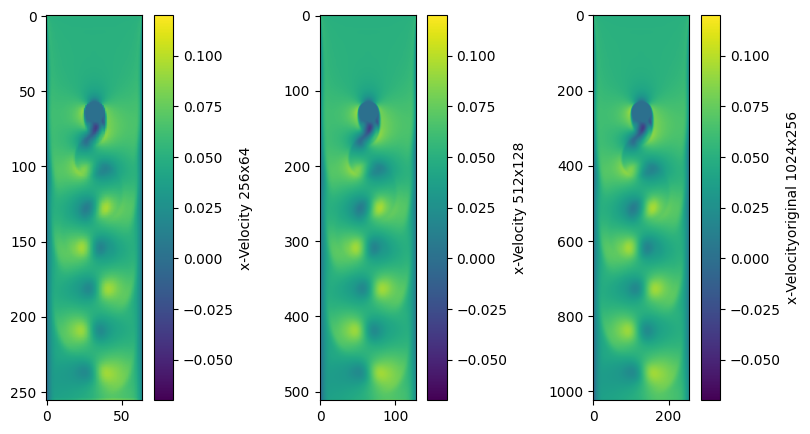

In [27]:
#create gif of the density data include Re in the filename 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# fig = plt.figure()
# ims = []
#include the Re and timestep in each frame# Set up the colorbar limits
vmin = -0.07
vmax = 0.12

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ims = []

# Create the first image to initialize the colorbars
#im1 = axes[0].imshow(density_data[0, :, :].numpy(), vmin=vmin, vmax=vmax, cmap='viridis')
#im2 = axes[1].imshow(density_data_original[0, :, :].numpy(), vmin=vmin, vmax=vmax, cmap='viridis')

im0 = axes[0].imshow(velocity_data_down_downsampled[0, 0, :, :].numpy(), cmap='viridis')
im1 = axes[1].imshow(velocity_data[0, 0, :, :].numpy(), cmap='viridis')
im2 = axes[2].imshow(velocity_data_original[0, 0, :, :].numpy(), cmap='viridis')

# Add colorbars for both subplots
cbar0 = fig.colorbar(im0, ax=axes[0])
cbar0.set_label('x-Velocity 256x64')

cbar1 = fig.colorbar(im1, ax=axes[1])
cbar1.set_label('x-Velocity 512x128')

cbar2 = fig.colorbar(im2, ax=axes[2])
cbar2.set_label('x-Velocityoriginal 1024x256')

def update_frame(i):

    im0.set_data(velocity_data_down_downsampled[i, 0, :, :].numpy())  # Update density_data_0
    im1.set_data(velocity_data[i, 0, :, :].numpy())  # Update density_data_1
    im2.set_data(velocity_data_original[i, 0, :, :].numpy())  # Update density_data_2


    im0.set_clim(vmin=vmin, vmax=vmax)
    im1.set_clim(vmin=vmin, vmax=vmax)
    im2.set_clim(vmin=vmin, vmax=vmax)
    
    # Redraw the colorbars to reflect the new limits
    cbar0.update_normal(im0)
    cbar1.update_normal(im1)
    cbar2.update_normal(im2)

    
    return [im0, im1, im2]
#fig.colorbar()
#ani = animation.FuncAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani = animation.FuncAnimation(fig, update_frame, frames=velocity_data.shape[0], interval=50, blit=False, repeat_delay=1000)

ani.save(f'DS_x_velocity_karman_Re_{Re}.gif', writer='imagemagick', fps=10)

## y-velocity gif

MovieWriter imagemagick unavailable; using Pillow instead.


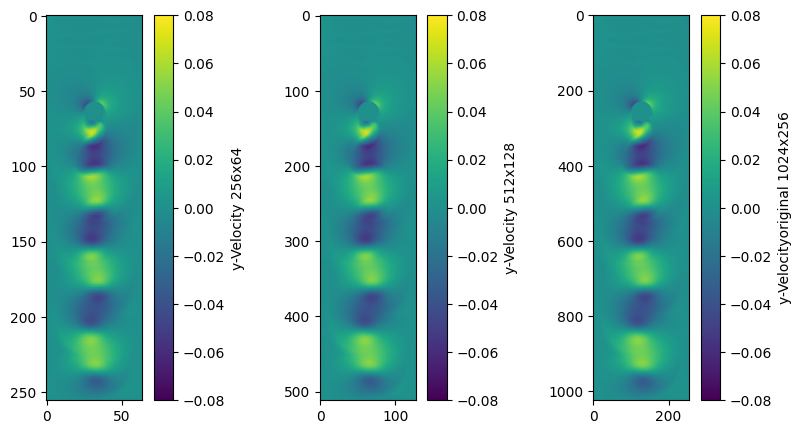

In [32]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

vmin = -0.08
vmax = 0.08

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ims = []

im0 = axes[0].imshow(velocity_data_down_downsampled[0, 1, :, :].numpy(), cmap='viridis')
im1 = axes[1].imshow(velocity_data[0, 1, :, :].numpy(), cmap='viridis')
im2 = axes[2].imshow(velocity_data_original[0, 1, :, :].numpy(), cmap='viridis')

# Add colorbars for both subplots
cbar0 = fig.colorbar(im0, ax=axes[0])
cbar0.set_label('y-Velocity 256x64')

cbar1 = fig.colorbar(im1, ax=axes[1])
cbar1.set_label('y-Velocity 512x128')

cbar2 = fig.colorbar(im2, ax=axes[2])
cbar2.set_label('y-Velocityoriginal 1024x256')

def update_frame(i):

    im0.set_data(velocity_data_down_downsampled[i, 1, :, :].numpy())  # Update density_data_0
    im1.set_data(velocity_data[i, 1, :, :].numpy())  # Update density_data_1
    im2.set_data(velocity_data_original[i, 1, :, :].numpy())  # Update density_data_2


    im0.set_clim(vmin=vmin, vmax=vmax)
    im1.set_clim(vmin=vmin, vmax=vmax)
    im2.set_clim(vmin=vmin, vmax=vmax)
    
    # Redraw the colorbars to reflect the new limits
    cbar0.update_normal(im0)
    cbar1.update_normal(im1)
    cbar2.update_normal(im2)

    
    return [im0, im1, im2]
#fig.colorbar()
#ani = animation.FuncAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani = animation.FuncAnimation(fig, update_frame, frames=velocity_data.shape[0], interval=50, blit=False, repeat_delay=1000)

ani.save(f'DS_y_velocity_karman_Re_{Re}.gif', writer='imagemagick', fps=10)

In [81]:
import numpy as np
from scipy.ndimage import zoom

# Original 6x6 array
array = np.array([
    [1.0,  2.0,  3.0,  4.0,  5.0,  6.0],
    [7.0,  8.0,  9.0, 10.0, 11.0, 12.0],
    [13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
    [19.0, 20.0, 21.0, 22.0, 23.0, 24.0],
    [25.0, 26.0, 27.0, 28.0, 29.0, 30.0],
    [31.0, 32.0, 33.0, 34.0, 35.0, 36.0]
])

# Zoom by a factor of 0.5 using nearest-neighbor interpolation (order=0)
zoomed_array_nn = zoom(array, zoom=0.5, order=1, grid_mode=True, mode='grid-constant')

print(zoomed_array_nn)


[[ 4.5  6.5  8.5]
 [16.5 18.5 20.5]
 [28.5 30.5 32.5]]
